
Hello, we will explore bikeshare data from three US cities. Let's do it! 

Choose your city to explore: Chicago = 1, New York =2, Washington = 3: 
1
You chose Chicago


Choose your month -- Jan = 1, Feb = 2, Mar = 3, Apr = 4, May = 5, June = 6, All = 7: 
7
You chose 'All'

Choose your day -- Mon = 0, Tues = 1, Wed = 2, Thur = 3, Fri = 4, Sat = 5, Sun = 6, All = 7: 
7
You chose 'All'

CALCULATING THE MOST FREQUENT TIMES OF TRAVEL...

All data from year: 2017

Mon  Users
6  98081
5  66755
4  51659
2  32057
3  29639
1  21809

The most common month: June


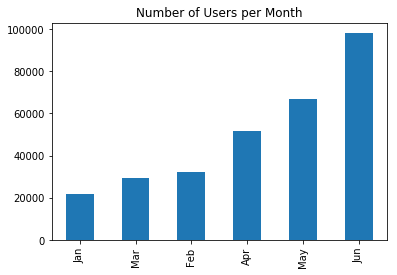


The most common day of the week:  Tuesday


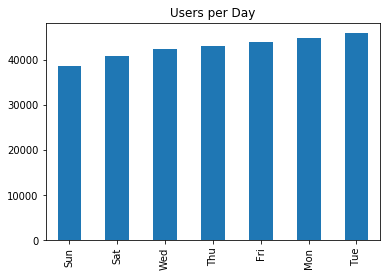


The most common start hour of the day:  17

Most common end hour of the day:  17

Earliest start hour: 0

Latest start hour 23

3       372
4       467
2       609
1       982
0      1686
5      2437
23     3014
22     4895
21     7103
6      8246
20    10301
10    11952
9     13691
11    15040
19    15715
12    17467
13    17559
14    17596
7     18380
15    20108
18    23512
8     24134
16    28742
17    35992
Name: start hour, dtype: int64


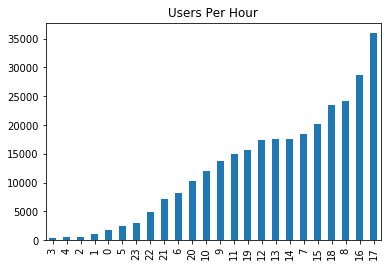


This took 2.8486552238464355 seconds.
----------------------------------------

CALCULATING THE MOST POPULAR STATIONS AND TRIP...

Most common start station:  Streeter Dr & Grand Ave

Most common end station:  Streeter Dr & Grand Ave

Most popular trip -- FROM: Yates Blvd & 75th St, TO: Yates Blvd & 75th St 

Least popular trip -- FROM 2112 W Peterson Ave, TO: 2112 W Peterson Ave


This took 0.3994929790496826 seconds.
----------------------------------------

CALCULATING TRIP DURATION...

Total travel time: 78019 hours 56 minutes 27 seconds

Travel time average: 15.0 minutes 36.24 seconds

Travel time median: 11.0 minutes 10.00 seconds

Longest trip: 23 hours 57 minutes 4 seconds

Shortest trip: 60 seconds


This took 0.010970830917358398 seconds.
----------------------------------------

CALCULATING USER STATS...

User type counts:

 Subscriber  238889
  Customer   61110
 Dependent       1

Percentage of users as subscribers: 79.63%

Percentage of users as customers: 20.37%



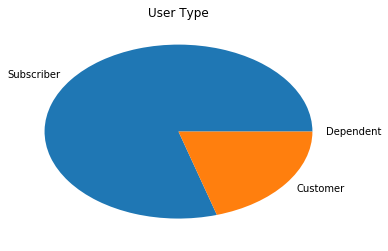

Gender counts:

  Male  181190
Female   57758

Percentage of users as males: 75.83%

Percentage of users as females: 24.17%



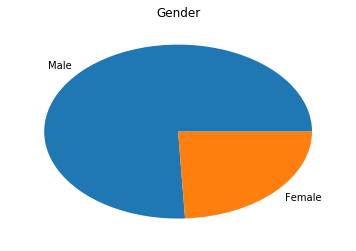


Female    Customer       9
Female  Subscriber   57749
  Male    Customer      82
  Male   Dependent       1
  Male  Subscriber  181107

Most common birth year:  1989

Most recent birth year: 2016

Earliest birth year: 1899


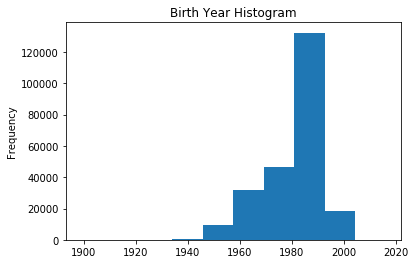


This took 2.408378839492798 seconds.
----------------------------------------

Would you like to restart? Enter Y or N.
n
Goodbye


In [92]:
import PyQt5
import matplotlib.pyplot as plt
import time
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import calendar

class Bikeshare:
    print()
    print('Hello, we will explore bikeshare data from three US cities. Let\'s do it! \n')
    
    def __init__(self):
        self.city_data = { '1': 'chicago.csv',
                     '2': 'new_york_city.csv',
                      '3': 'washington.csv' }

        self.cities = {'Chicago':'1', 'New York': '2', 'Washington': '3'}
        self.months = {'January':'1', 'February':'2', 'March':'3', 'April':'4','May':'5', 'June':'6', 'All':'7'}
        self.days = {'Monday':'0', 'Tuesday':'1', 'Wednesday':'2', 'Thursday':'3', 
                         'Friday':'4', 'Saturday':'5', 'Sunday':'6', 'All':'7'}

    def filter_load_data(self):
        global city, month, day
        err_msg = 'Invalid, try again...'
        while True:
            city = input('Choose your city to explore: Chicago = 1, New York =2, Washington = 3: \n')
            if city in self.cities.values():
                city_name = [k for k,v in self.cities.items() if v == city]
                print('You chose', city_name[0].capitalize())
                print()
                break
            else:
                try:
                    print()
                    print(err_msg)

                except:
                    pass
        while True:
            print()
            month = input('Choose your month -- Jan = 1, Feb = 2, Mar = 3, Apr = 4, May = 5, June = 6, All = 7: \n').capitalize()
            if month not in self.months.values():
                    print(err_msg)
            else:
                try: 
                    if month != str(7):
                        print('You chose', calendar.month_name[int(month)])
                        print()
                    else:
                        print("You chose 'All'")
                    break
                except: 
                    print(err_msg)
        while True:
            print()
            day = input('Choose your day -- Mon = 0, Tues = 1, Wed = 2, Thur = 3, Fri = 4, Sat = 5, Sun = 6, All = 7: \n').capitalize()
            if day not in self.days.values():
                    print(err_msg)
            else:
                try: 
                    if day != str(7):
                        print('You chose', calendar.day_name[int(day)])
                    else: 
                        print("You chose 'All'")
                    break
                except: 
                    print(err_msg)
    
        month = int(month)
        day = int(day)
        
        # loads data file into a dataframe
        df = pd.read_csv(self.city_data[city])

        #change name of user column from 'Unnamed: 0' to 'User Id'
        column_rename = df.columns.values 
        column_rename[0] = 'User Id'
        df.columns = column_rename

        # convert the Start Time column to datetime
        df['Start Time'] = pd.to_datetime(df['Start Time'])
        df['End Time'] = pd.to_datetime(df['End Time'])

        # extracts month, day of the week, and hour from Start Time to create new columns
        df['year'] = df['Start Time'].dt.year
        df['month'] = df['Start Time'].dt.month
        df['day_of_week'] = df['Start Time'].dt.dayofweek
        df['start hour'] = df['Start Time'].dt.hour
        df['end hour'] = df['End Time'].dt.hour

        # filter by month if applicable
        if month != 7:
            # use the index of the months list to get the corresponding int
            months = list(range(1,8)) 
            month = months.index(month) + 1

            # filter by month to create the new dataframe
            df = df[df['month'].values == month]

        # filter by day of week if applicable
        if day != 7:
            # filter by day of week to create the new dataframe
            df = df[df['day_of_week'].values == day]

        return city, month, day, df 
    
    def stats(self, df):  
############################################### Time Stats ########################################################
        print(str('\nCalculating The Most Frequent Times of Travel...\n').upper())
        start_time = time.time()
        year = df['year'].min()
       
        print('All data from year:', year)
        print()
        # Displays the most common month
        month_mode = df['month'].mode()[0]
        month_counts = df['month'].value_counts().reset_index()

        if month == 7:
            print('Number of users each month: ')
            print(month_counts.to_string(header = None, index = None))
            print()
            print('The most common month:', calendar.month_name[month_mode])
            df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
            month_counts = df['month'].value_counts(ascending=True)
            month_counts.plot(title='Number of Users per Month', kind='bar', legend = False)
            plt.show()

        # TO DO: display the most common day of week
        day_mode = df['day_of_week'].mode()[0]

        if day == 7:
            print()
            print('The most common day of the week: ', calendar.day_name[day_mode])
            df['day_of_week'] = df['day_of_week'].apply(lambda x: calendar.day_abbr[x])
            day_counts = df['day_of_week'].value_counts(ascending=True)
            day_counts.plot(title='Users per Day', kind='bar', legend = False)
            plt.show()

        # TO DO: display the most common start hour
        startHour_mode = df['start hour'].mode()[0]
        print()
        print('The most common start hour of the day: ', startHour_mode)
        print()
        endHour_mode = df['end hour'].mode()[0]
        print('Most common end hour of the day: ', endHour_mode)
        print()
        startHr_min = df['start hour'].min()
        print('Earliest start hour:', startHr_min)
        print()
        startHr_max = df['start hour'].max()
        print('Latest start hour', startHr_max)
        print()
        hour_counts = df['start hour'].value_counts(ascending=True)
        print(hour_counts)
        hour_counts.plot(x = 'hour', title='Users Per Hour', kind='bar', legend = False)
        plt.show()

        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)

############################################### Station ########################################################
        print(str('\nCalculating The Most Popular Stations and Trip...\n').upper())
        start_time = time.time()

        # TO DO: display most commonly used start station
        start_station_mode = df['Start Station'].mode()[0]
        print('Most common start station: ', start_station_mode)

        # TO DO: display most commonly used end station
        end_station_mode = df['End Station'].mode()[0]
        print()
        print('Most common end station: ', end_station_mode)
        print()

        # TO DO: display most frequent combination of start station and end station trip
        loc_combo_mode = max(df.groupby(['Start Station', 'End Station']).size().index)
        print('Most popular trip -- FROM: %s, TO: %s '  % (loc_combo_mode[0], loc_combo_mode[1]))
        print()
        least_pop_trip = min(df.groupby(['Start Station', 'End Station']).size().index)
        print('Least popular trip -- FROM %s, TO: %s' % (least_pop_trip[0], least_pop_trip[1]))
        print()
        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)

############################################### Trip Duration ########################################################
        print(str('\nCalculating Trip Duration...\n').upper())
        start_time = time.time()

        # TO DO: display total travel time
        total_time = df['Trip Duration'].sum() 
        print('Total travel time: %s hours %s minutes %s seconds' % (total_time//3600, total_time%3600//60, 
                                                                     total_time%3600%60))
        print()

        # TO DO: display mean travel time
        time_avg = df['Trip Duration'].mean()
        print('Travel time average: %s minutes %.2f seconds' % (time_avg//60, time_avg%60))
        print()
        
        #Displays the median travel time to get a better idea of central tendency
        time_median = df['Trip Duration'].median()
        print('Travel time median: %s minutes %.2f seconds' % (time_median//60, time_median%60))
        print()

        #Displays maximum trip duration
        time_max = df['Trip Duration'].max()
        print('Longest trip: %s hours %s minutes %s seconds' % (time_max//3600, time_max%3600//60, 
                                                                time_max%3600%60))
        print()

        #Displays minimum trip duration
        time_min = df['Trip Duration'].min()
        print('Shortest trip: %s seconds' % (time_min))
        print()


        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)

############################################ User Stats ########################################################
        print(str('\nCalculating User Stats...\n').upper())
        start_time = time.time()

        # TO DO: Display counts of user types 
        user_type = df['User Type'].value_counts().reset_index()
        print('User type counts:\n\n', user_type.to_string(header=None, index=None))
        print()
        user_type_counts = df['User Type'].value_counts()
        subscriber = df['User Type'].value_counts()[0]
        customer = df['User Type'].value_counts()[1]
        percent_subscriber = (subscriber/(subscriber + customer))*100
        percent_customer = (customer/(customer + subscriber))*100
        print('Percentage of users as subscribers: {0:.2f}%'.format(percent_subscriber))
        print()
        print('Percentage of users as customers: {0:.2f}%'.format(percent_customer))
        print()
        user_type_counts.plot(kind='pie', title='User Type').set_ylabel('')
        plt.show()

        # Displays gender counts
        try:
            gender = df['Gender'].value_counts().reset_index()
            print('Gender counts:\n\n ', gender.to_string(header=None, index=None))
            print()
            gender_counts = df['Gender'].value_counts()
            male = gender_counts[0]
            female = gender_counts[1]
            percentage_male = (male/(male + female))*100
            percentage_female = (female/(female + male))*100
            print('Percentage of users as males: {0:.2f}%'.format(percentage_male))
            print()
            print('Percentage of users as females: {0:.2f}%'.format(percentage_female))
            print()
            gender_counts.plot(kind='pie', title='Gender').set_ylabel('')
            plt.show()
            print()
            gender_userType = df.groupby(['Gender', 'User Type']).size().reset_index()
            print(gender_userType.to_string(header=None, index=None))
        except KeyError:
            print('Washington has no gender data')

        print()

        # Displays earliest, most recent, and most common year of birth
        try:
            birthYear_mode = df['Birth Year'].mode()[0]
            print('Most common birth year: ', int(birthYear_mode))
            print()
            mostRecent_birthYear = df['Birth Year'].max()
            print('Most recent birth year:', int(mostRecent_birthYear))
            print()
            earliest_birthYear = df['Birth Year'].min()
            print('Earliest birth year:', int(earliest_birthYear))
            df['Birth Year'].plot(kind='hist', title='Birth Year Histogram')
            plt.show()
        except KeyError:
            print('Washington has no birth year data')

        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)
            
def main():
    while True:
        city, month, day, df = Bikeshare().filter_load_data()
        Bikeshare().stats(df)
        
        while True:
            valid_responses = ['Y', 'N']
            restart = input('\nWould you like to restart? Enter Y or N.\n').capitalize()
            if restart not in valid_responses:
                print('Invalid input. Y or N?')
            elif restart == 'Y':
                city, month, day, df = Bikeshare().filter_load_data()
                Bikeshare().stats(df)
                
            elif restart != 'Y':
                #print('Bye!')
                #tts('Goodbye','goodbye')
                print('Goodbye')
                break
        break
            
if __name__ == "__main__":
	main()

In [2]:
chicago_df = pd.read_csv('chicago.csv')
ny_df = pd.read_csv('new_york_city.csv')
wash_df = pd.read_csv('washington.csv')


trip_list = ['distance between ' + a + ' and ' + b + ' Chicago, IL' for a, b in zip(chicago_df['Start Station'], chicago_df['End Station'])]
print(len(trip_list))

300000


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

chicago_dist_list = []
for item in trip_list:
    driver = webdriver.Firefox()
    driver.get("http://www.google.com")
    input_element = driver.find_element_by_name("q")
    input_element.send_keys(item)
    input_element.submit()


    RESULTS_LOCATOR = "//div/span[1]/span[2]" #/html/body/div[5]/div[3]/div[10]/div[1]/div[2]/div/div[2]/div[2]/div/div/div/div[1]/div/div[2]/div/div/div/div/div[4]/div[3]/div/div[2]/div[1]/div[1]/div/div/span[1]/span[2]

    WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, RESULTS_LOCATOR)))

    page1_results = driver.find_elements(By.XPATH, RESULTS_LOCATOR)

    for item in page1_results[:1]:
        print(item.text[:3])
        chicago_dist_list.append(item.text[:3])
    driver.close()


0.7
3.1
0.8
0.9
1.1
1.0
0.6
1.4
1.4
1.3
0.6
2.7
0.7
1.1
1.2
1.2
1.7
0.5
0.9
0.7
3.2
1.8
2.0
1.9
1.1
3.8
0.6
0.8
1.8
0.6
1.0
3.3
2.1
1.2
0.6
2.8
0.7
1.3
0.8
1.8
1.8
2.9


KeyboardInterrupt: 

In [6]:
chicago_dist_list = [int(dist) for dist in chicago_dist_list]
print(chicago_dist_list)

[]


In [59]:

raw_df = pd.read_json('stations.json')
df_stationBeanList = raw_df['stationBeanList'].apply(pd.Series)
new_df = df_stationBeanList.drop(['altitude', 'availableBikes', 'availableDocks', 'id', 'is_renting', 'kioskType', 'lastCommunicationTime', 'stAddress1','stAddress2', 'status', 'statusKey', 'statusValue', 'testStation', 'totalDocks'], axis = 1)
new_df = new_df.drop(['landMark', 'location', 'postalCode'], axis=1)
new_df = new_df.drop(['city'], axis=1)
new_df = new_df[['stationName', 'latitude', 'longitude']]
new_df.rename(columns={'stationName':'station'}, inplace=True)
chicago_2017 = pd.read_csv('Divvy_Stations_2017_Q1Q2.csv')
chicago_2017 = chicago_2017.drop(['id', 'city', 'dpcapacity', 'online_date'], axis=1)
chicago_2017.rename(columns={'name':'station'}, inplace=True)
station_LatLong_df = pd.concat([new_df, chicago_2017], axis=0)

stations_LatLong = station_LatLong_df.drop_duplicates(['station'])
stations_LatLong['Lat & Long'] = list(zip(stations_LatLong['latitude'], stations_LatLong['longitude']))
stations_LatLong.drop(['latitude', 'longitude'], axis=1)
ts = pd.Series(stations_LatLong['Lat & Long'].values, index=stations_LatLong['station'])
ts['Clinton St & Jackson Blvd'] = (41.883434, -87.640507)
chicago_df['Start (Lat,Long)'] = chicago_df['Start Station'].map(ts)
chicago_df['End (Lat,Long)'] = chicago_df['End Station'].map(ts)
#chicago_df = chicago_df.drop(['Lat & Long', 'Start Lat & Long'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,"Start (Lat,Long)","End (Lat,Long)"
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0,"(41.889587, -87.671956)","(41.895769, -87.67722)"
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0,"(41.926277, -87.630834)","(41.949399, -87.654529)"
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0,"(41.8694821, -87.6554864)","(41.869154, -87.671045)"
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0,"(41.9683544936, -87.7118306675)","(41.9803942348, -87.7161149615)"
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0,"(41.884576228, -87.63188991)","(41.878287, -87.643909)"
5,1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990.0,"(41.88338, -87.64117)","(41.870257, -87.639474)"
6,961916,2017-05-26 09:41:44,2017-05-26 09:46:25,281,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983.0,"(41.88541, -87.66732)","(41.889587, -87.671956)"
7,65924,2017-01-21 14:28:38,2017-01-21 14:40:41,723,Larrabee St & Kingsbury St,Larrabee St & Armitage Ave,Customer,NaN,NaN,"(41.897764, -87.642884)","(41.918084, -87.643749)"
8,606841,2017-04-20 16:08:51,2017-04-20 16:20:20,689,Sedgwick St & Huron St,Halsted St & Blackhawk St (*),Subscriber,Male,1984.0,"(41.894666, -87.638437)","(41.908537, -87.648627)"
9,135470,2017-02-06 18:00:47,2017-02-06 18:09:00,493,Stetson Ave & South Water St,Clinton St & Washington Blvd,Subscriber,Male,1979.0,"(41.886835, -87.62232)","(41.88338, -87.64117)"


In [82]:
import math
chicago_df['Start Lat Radians'] = pd.Series([math.radians(chicago_df['Start (Lat,Long)'][i][0]) for 
                                             i in range(len(chicago_df['Start (Lat,Long)']))])
chicago_df['Start Long Radians'] = pd.Series([math.radians(chicago_df['Start (Lat,Long)'][i][1]) for 
                                             i in range(len(chicago_df['Start (Lat,Long)']))])
chicago_df['End Lat Radians'] = pd.Series([math.radians(chicago_df['End (Lat,Long)'][i][0]) for 
                                             i in range(len(chicago_df['End (Lat,Long)']))])
chicago_df['End Long Radians'] = pd.Series([math.radians(chicago_df['End (Lat,Long)'][i][1]) for 
                                             i in range(len(chicago_df['End (Lat,Long)']))])
chicago_df        

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,"Start (Lat,Long)","End (Lat,Long)",start lat radians,Start Lat Radians,Start Long Radians,End Lat Radians,End Long Radians
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0,"(41.889587, -87.671956)","(41.895769, -87.67722)","(41.889587, -87.671956)",0.731111,-1.530164,0.731219,-1.530256
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0,"(41.926277, -87.630834)","(41.949399, -87.654529)","(41.926277, -87.630834)",0.731752,-1.529447,0.732155,-1.529860
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0,"(41.8694821, -87.6554864)","(41.869154, -87.671045)","(41.8694821, -87.6554864)",0.730760,-1.529877,0.730755,-1.530148
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0,"(41.9683544936, -87.7118306675)","(41.9803942348, -87.7161149615)","(41.9683544936, -87.7118306675)",0.732486,-1.530860,0.732696,-1.530935
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0,"(41.884576228, -87.63188991)","(41.878287, -87.643909)","(41.884576228, -87.63188991)",0.731024,-1.529465,0.730914,-1.529675
5,1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990.0,"(41.88338, -87.64117)","(41.870257, -87.639474)","(41.88338, -87.64117)",0.731003,-1.529627,0.730774,-1.529597
6,961916,2017-05-26 09:41:44,2017-05-26 09:46:25,281,Ashland Ave & Lake St,Wood St & Hubbard St,Subscriber,Female,1983.0,"(41.88541, -87.66732)","(41.889587, -87.671956)","(41.88541, -87.66732)",0.731038,-1.530083,0.731111,-1.530164
7,65924,2017-01-21 14:28:38,2017-01-21 14:40:41,723,Larrabee St & Kingsbury St,Larrabee St & Armitage Ave,Customer,NaN,NaN,"(41.897764, -87.642884)","(41.918084, -87.643749)","(41.897764, -87.642884)",0.731254,-1.529657,0.731609,-1.529672
8,606841,2017-04-20 16:08:51,2017-04-20 16:20:20,689,Sedgwick St & Huron St,Halsted St & Blackhawk St (*),Subscriber,Male,1984.0,"(41.894666, -87.638437)","(41.908537, -87.648627)","(41.894666, -87.638437)",0.731200,-1.529579,0.731442,-1.529757
9,135470,2017-02-06 18:00:47,2017-02-06 18:09:00,493,Stetson Ave & South Water St,Clinton St & Washington Blvd,Subscriber,Male,1979.0,"(41.886835, -87.62232)","(41.88338, -87.64117)","(41.886835, -87.62232)",0.731063,-1.529298,0.731003,-1.529627


In [ ]:
import math 

def points2distance(start,  end):  
  """ 
    Calculate distance (in kilometers) between two points given as (long, latt) pairs 
    based on Haversine formula (http://en.wikipedia.org/wiki/Haversine_formula). 
    Implementation inspired by JavaScript implementation from http://www.movable-type.co.uk/scripts/latlong.html 
    Accepts coordinates as tuples (deg, min, sec), but coordinates can be given in any form - e.g. 
    can specify only minutes: 
    (0, 3133.9333, 0)  
    is interpreted as  
    (52.0, 13.0, 55.998000000008687) 
    which, not accidentally, is the lattitude of Warsaw, Poland. 
  """  
  start_long = math.radians()  
  start_latt = math.radians()  
  end_long = math.radians(recalculate_coordinate(end[0]))  
  end_latt = math.radians(recalculate_coordinate(end[1]))  
  d_latt = end_latt - start_latt  
  d_long = end_long - start_long  
  a = math.sin(d_latt/2)**2 + math.cos(start_latt) * math.cos(end_latt) * math.sin(d_long/2)**2  
  c = 2 * math.asin(math.sqrt(a))  
  return 6371 * c